In [1]:
!pip install -Uqq fastbook
import fastbook 
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.8MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 194kB 55.8MB/s 
     |████████████████████████████████| 1.2MB 53.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 12.8MB 201kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [24]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images", bs=128)

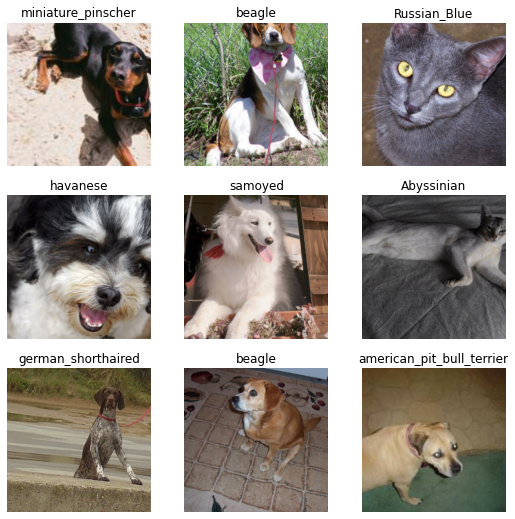

In [6]:
dls.show_batch()

In [19]:
print(dls.valid.one_batch()[0].shape)

torch.Size([64, 3, 224, 224])


## Baseline

In [28]:
learn_bl = cnn_learner(dls, resnet34, metrics=error_rate)
learn_bl.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.094919,1.103391,0.334235,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.471766,0.975800,0.298376,01:14
1,0.386576,0.758754,0.238160,01:13
2,0.292636,0.658516,0.202300,01:13
3,0.207396,0.632811,0.190122,01:13
4,0.151150,0.598812,0.181326,01:13


18% after 5 epochs with 128 bs, 1:14 per epoch


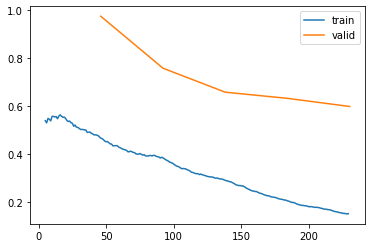

In [29]:
learn_bl.recorder.plot_loss()

## Mixed Precision Training

In [13]:
learn_mp = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn_mp.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.479159,0.881878,0.266576,01:06
1,0.318002,0.742884,0.229364,01:06


Using half-precision floating points doesn't really speed up things as much as the book claimed here.


## Learning rate finder

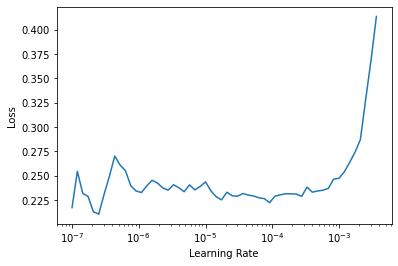

In [33]:
learn_lr = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
lr_min, lr_steep = learn.lr_find()

In [35]:
learn_lr = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn_lr.fine_tune(5, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.824356,1.251000,0.357240,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.449489,0.924298,0.289581,01:03
1,0.370933,0.869321,0.258457,01:03
2,0.300601,0.822396,0.239513,01:03
3,0.209703,0.677542,0.213802,01:03
4,0.137542,0.640262,0.198241,01:04


## 1Cycle Training

In [36]:
learn_cycle = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn_cycle.fit_one_cycle(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.977206,0.931496,0.291610,01:01
1,0.869226,0.823154,0.246955,01:02
2,0.511148,1.097818,0.303112,01:01
3,0.347184,1.018236,0.308525,01:02
4,0.255269,0.920045,0.282138,01:01


In [37]:
learn_cycle.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775847473997e-07)

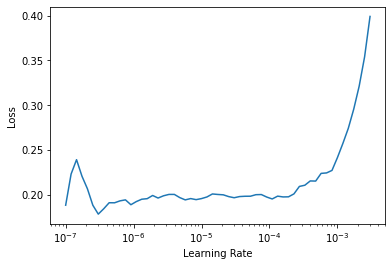

In [38]:
learn_cycle.lr_find()

In [39]:
learn_cycle.fit_one_cycle(6, 3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.200933,0.902035,0.261840,01:02
1,0.199045,0.750573,0.238836,01:02
2,0.166081,0.746400,0.230717,01:01
3,0.140983,0.792603,0.247632,01:03
4,0.129023,0.803522,0.240189,01:03
5,0.113239,0.778205,0.233424,01:02
